Random forests are robust to overfitting, can handle thousands of input variables without variable decision, and run efficiently on large datasets. A random forest seems like it could work well as our predictor for san francisco crime data. 

In [23]:
#imports 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from path import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

In [24]:
#load data
file_path = Path("../Resources/ml_df.csv")
df = pd.read_csv(file_path)
df.head()

,ZipCode,PdDistricts,Months,Day,TimeOfDay,Resolutions,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,...,Descript_POSSESSION OF NARCOTICS PARAPHERNALIA,Descript_RESISTING ARREST,Descript_STOLEN AUTOMOBILE,Descript_STOLEN TRUCK,Descript_SUSPICIOUS OCCURRENCE,Descript_THREATS AGAINST LIFE,Descript_TRAFFIC VIOLATION,Descript_TRAFFIC VIOLATION ARREST,Descript_TRESPASSING,Descript_WARRANT ARREST
0,-0.860927,0.950634,-0.443307,-1.465466,0.720326,0,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
1,-0.860927,0.950634,-0.443307,-1.465466,0.720326,0,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
2,0.909206,-1.566836,-1.598508,-0.970159,-1.132944,0,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,6.883863
3,-0.439467,1.669911,-0.443307,1.011070,-0.206309,1,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
4,-0.945219,-0.487921,-0.443307,-1.465466,1.646961,1,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267


In [25]:
#create features
X = df.drop("Resolutions", axis=1)

#create target
y = df["Resolutions"]

In [26]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [28]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 83.62%


In [29]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,8279,1522
Actual 1,4654,22344


In [30]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.84      0.83      0.73      0.84      0.70      9801
          1       0.94      0.83      0.84      0.88      0.84      0.70     26998

avg / total       0.86      0.83      0.84      0.84      0.84      0.70     36799



In [31]:
# List the features sorted in descending order by feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
features = X.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

Feature ranking:
1. ZipCode (0.134581)
2. PdDistricts (0.096868)
3. Months (0.090383)
4. Day (0.084387)
5. TimeOfDay (0.067002)
6. Category_ASSAULT (0.055490)
7. Category_BURGLARY (0.047243)
8. Category_DRUG/NARCOTIC (0.045785)
9. Category_FRAUD (0.032114)
10. Category_LARCENY/THEFT (0.029418)
11. Category_MISSING PERSON (0.025292)
12. Category_NON-CRIMINAL (0.023387)
13. Category_OTHER (0.018239)
14. Category_OTHER OFFENSES (0.016839)
15. Category_ROBBERY (0.014378)
16. Category_SECONDARY CODES (0.011138)
17. Category_SUSPICIOUS OCC (0.010944)
18. Category_TRESPASS (0.010901)
19. Category_VANDALISM (0.010485)
20. Category_VEHICLE THEFT (0.010318)
21. Category_WARRANTS (0.009915)
22. Category_WEAPON LAWS (0.009523)
23. Descript_AGGRAVATED ASSAULT WITH A DEADLY WEAPON (0.009431)
24. Descript_AIDED CASE (0.009332)
25. Descript_AIDED CASE, MENTAL DISTURBED (0.008179)
26. Descript_BATTERY (0.008067)
27. Descript_BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP (0.007997)
28. Descript_CREDIT C

this feature ranking is based on tree entropy 

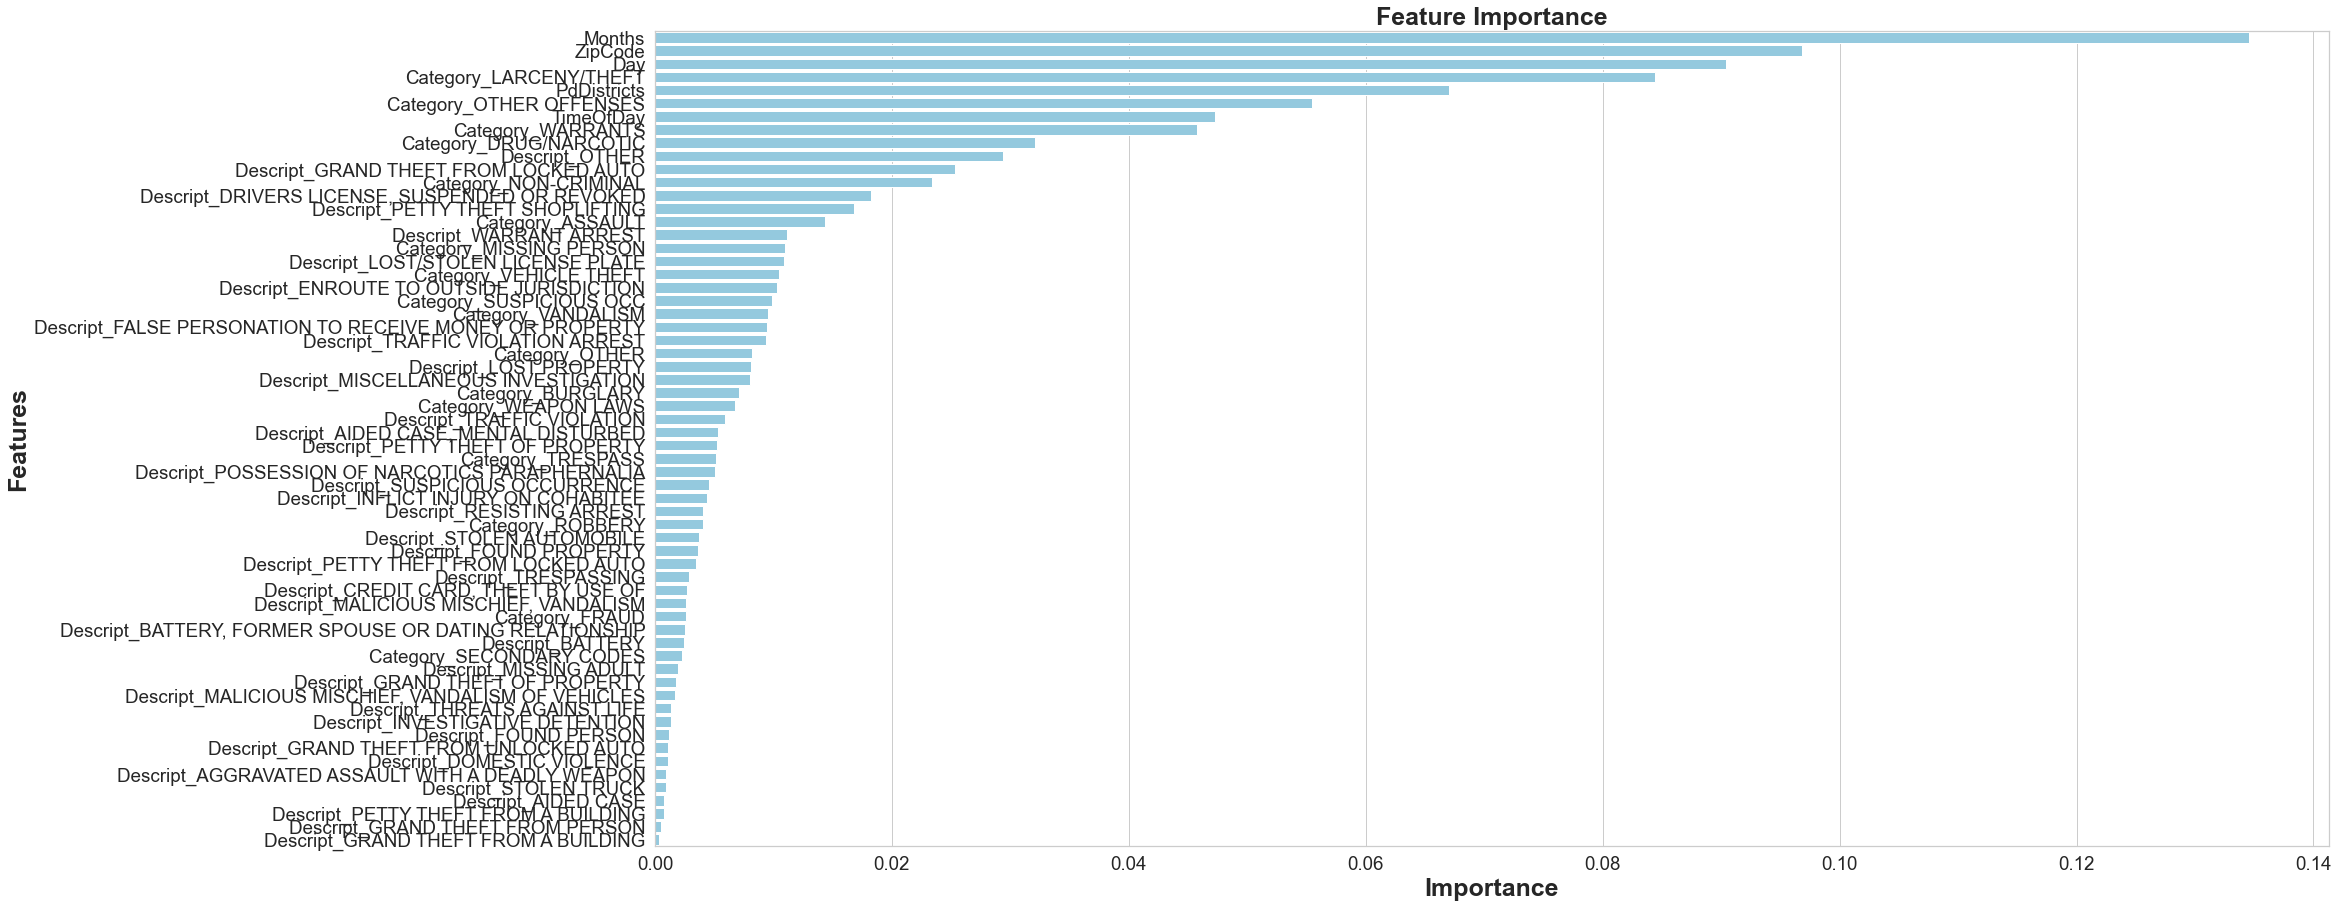

None

,Features,Gini-Importance
0,Months,0.134581
1,ZipCode,0.096868
2,Day,0.090383
3,Category_LARCENY/THEFT,0.084387
4,PdDistricts,0.067002
...,...,...
57,Descript_STOLEN TRUCK,0.000927
58,Descript_AIDED CASE,0.000782
59,Descript_PETTY THEFT FROM A BUILDING,0.000723
60,Descript_GRAND THEFT FROM PERSON,0.000513


In [32]:
#https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a
feats = {}
for feature, importance in zip(X.columns, brf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.savefig("/Users/bkirton/Desktop/sanFranCrimePredictor/images/GINI_graph.png")
display(plt.show())
display(importances)


This is our baseline random forest model. It uses all of the predicting features and default settings defined in the scikit-learn random forest classifier documentation. We can see what features are most important to the model to predict whether or not a crime will result in an arrest. 

In [33]:
#import our pca_df to train another baseline model to see if any improvements are made on predictions
file_path = Path("../Resources/pca_df.csv")
pca_df = pd.read_csv(file_path)
pca_df.head()


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,-1.246750,-0.844068,-0.409222,-0.132834,-0.630385,-0.377883,-0.069611,-0.022982,0.525461,0.509816,...,-0.459491,3.615547,-0.559291,-1.281498,-1.412709,0.253647,1.199879,0.385661,0.028593,0
1,-1.246750,-0.844068,-0.409222,-0.132834,-0.630385,-0.377883,-0.069611,-0.022982,0.525461,0.509816,...,-0.459491,3.615547,-0.559291,-1.281498,-1.412709,0.253647,1.199879,0.385661,0.028593,0
2,-0.895674,-2.624254,4.575264,3.256476,3.297004,1.436539,-0.077342,-0.052912,-0.334082,0.188428,...,-0.054629,1.259550,1.101362,0.978752,0.879054,-0.426530,-0.056600,0.109615,0.016318,0
3,-0.518046,1.870769,-1.905241,3.460478,0.170920,-0.182901,-0.438931,-0.046643,-0.302505,-0.287033,...,0.126208,-0.955255,1.025470,-1.150519,-0.170961,0.938536,0.276246,0.063581,0.027090,1
4,-0.692510,1.985794,-1.978356,3.231742,0.185565,-0.155337,-0.409014,-0.098214,-0.292047,-0.284270,...,0.089400,0.549029,0.164637,0.296134,-1.174351,-0.775759,0.005266,0.160528,0.028320,1


In [34]:
#create features
X = pca_df.drop("Target", axis=1)

#create target
y = pca_df["Target"]

In [35]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.5)

In [36]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [37]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 98.84%


In [38]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,19407,289
Actual 1,455,53447


In [39]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.99      0.99      0.98      0.99      0.98     19696
          1       0.99      0.99      0.99      0.99      0.99      0.98     53902

avg / total       0.99      0.99      0.99      0.99      0.99      0.98     73598



In [40]:
features = X.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

Feature ranking:
1. 0 (0.232390)
2. 1 (0.101644)
3. 2 (0.086214)
4. 3 (0.082351)
5. 4 (0.043788)
6. 5 (0.042654)
7. 6 (0.039441)
8. 7 (0.029717)
9. 8 (0.029584)
10. 9 (0.028368)
11. 10 (0.026492)
12. 11 (0.017838)
13. 12 (0.017191)
14. 13 (0.014846)
15. 14 (0.014843)
16. 15 (0.013741)
17. 16 (0.012520)
18. 17 (0.010990)
19. 18 (0.008638)
20. 19 (0.008024)
21. 20 (0.007918)
22. 21 (0.007637)
23. 22 (0.007137)
24. 23 (0.007130)
25. 24 (0.006939)
26. 25 (0.006727)
27. 26 (0.006222)
28. 27 (0.005955)
29. 28 (0.005901)
30. 29 (0.005386)
31. 30 (0.005315)
32. 31 (0.004909)
33. 32 (0.004805)
34. 33 (0.004584)
35. 34 (0.004531)
36. 35 (0.004431)
37. 36 (0.004106)
38. 37 (0.004053)
39. 38 (0.003889)
40. 39 (0.003318)
41. 40 (0.003276)
42. 41 (0.003216)
43. 42 (0.003038)
44. 43 (0.003024)
45. 44 (0.002992)
46. 45 (0.002809)
47. 46 (0.002639)
48. 47 (0.002508)
49. 48 (0.002462)
50. 49 (0.001870)


In [41]:
#test the model with the validation set 
brf.fit(X_train, y_train)
y_pred_val = brf.predict(X_val)

In [42]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_val,y_pred_val)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 98.92%


In [43]:
# Display the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,9671,115
Actual 1,265,26748


In [44]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_val,y_pred_val))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.99      0.98      0.99      0.98      9786
          1       1.00      0.99      0.99      0.99      0.99      0.98     27013

avg / total       0.99      0.99      0.99      0.99      0.99      0.98     36799

